<a href="https://colab.research.google.com/github/ayush2281/Machine-learning-Project/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dependencies**

In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [100]:
#load the diabetes dataset to a pandas dataset
df=pd.read_csv("/content/Fraud.csv")

# Data collection ananlysis

In [101]:
# it will print the Fist five rows and columns
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [102]:
# it will print the last five rows and columns
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
927044,43,CASH_OUT,88963.14,C2064018877,26832.00,0.00,C1369058691,0.00,88963.14,0.0,0.0
927045,43,PAYMENT,11540.72,C87427208,2306.00,0.00,M1070427126,0.00,0.00,0.0,0.0
927046,43,PAYMENT,12897.59,C370295470,50640.00,37742.41,M1588706900,0.00,0.00,0.0,0.0
927047,43,TRANSFER,222569.43,C1811320642,37742.41,0.00,C1875725720,1246257.16,1468826.59,0.0,0.0
927048,43,TRANSFER,174366.97,C1060162321,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [103]:
columns=df.columns

In [104]:
columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [105]:
# it will print the shape of the dataset(column n rows)
print(df.shape)

(927049, 11)


In [106]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927049 entries, 0 to 927048
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            927049 non-null  int64  
 1   type            927049 non-null  object 
 2   amount          927049 non-null  float64
 3   nameOrig        927049 non-null  object 
 4   oldbalanceOrg   927049 non-null  float64
 5   newbalanceOrig  927049 non-null  float64
 6   nameDest        927048 non-null  object 
 7   oldbalanceDest  927048 non-null  float64
 8   newbalanceDest  927048 non-null  float64
 9   isFraud         927048 non-null  float64
 10  isFlaggedFraud  927048 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 77.8+ MB


In [107]:
# used to view some basic statistical details like percentile, mean, std etc
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,927049.000000,9.270490e+05,9.270490e+05,9.270490e+05,9.270480e+05,9.270480e+05,927048.000000,927048.0
mean,23.676547,1.627395e+05,8.842787e+05,9.050586e+05,9.879809e+05,1.132663e+06,0.000543,0.0
std,11.942196,2.620741e+05,2.999742e+06,3.036590e+06,2.310515e+06,2.436170e+06,0.023287,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,14.000000,1.306330e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,19.000000,8.107067e+04,1.614000e+04,0.000000e+00,1.346067e+05,2.330301e+05,0.000000,0.0
75%,36.000000,2.200785e+05,1.444130e+05,1.852935e+05,9.269495e+05,1.177325e+06,0.000000,0.0
max,43.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.205466e+07,1.000000,0.0


In [108]:
df.isna().mean()

,0
step,0.000000
type,0.000000
amount,0.000000
nameOrig,0.000000
oldbalanceOrg,0.000000
newbalanceOrig,0.000000
nameDest,0.000001
oldbalanceDest,0.000001
newbalanceDest,0.000001
isFraud,0.000001


In [109]:
#display all the columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [110]:
#checking how many frauds are there

df['isFraud'].value_counts()

,count
isFraud,
0.0,926545
1.0,503


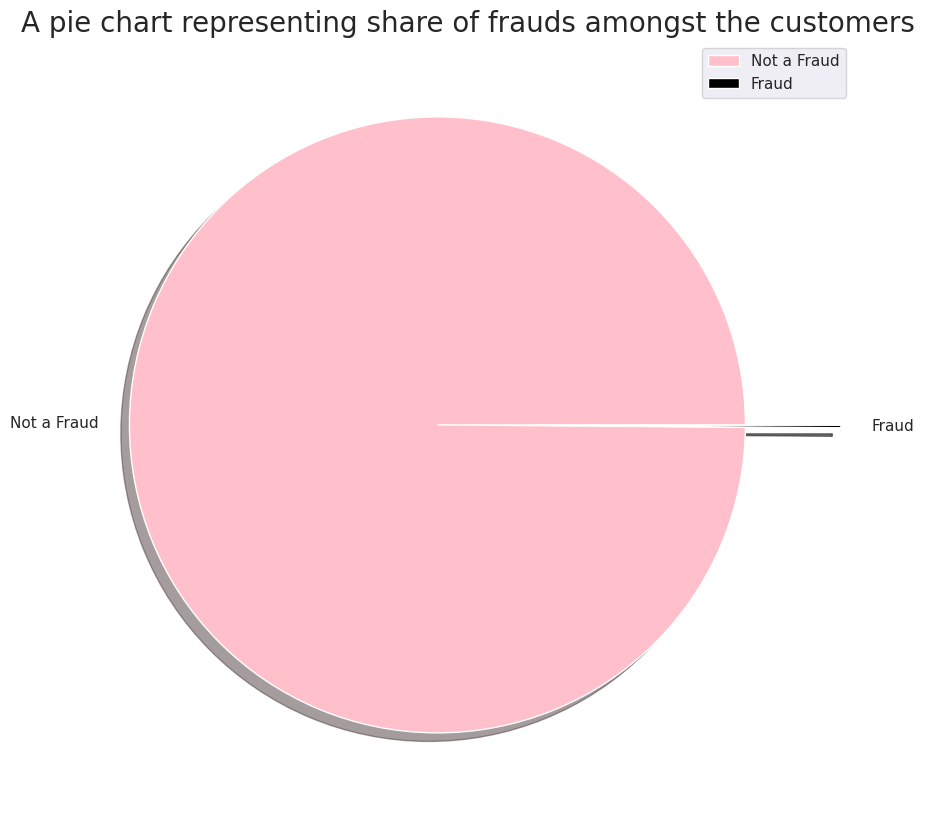

In [150]:
# Set up labels, colors, and explosion for visual appeal
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

# Configure plot size for better visibility
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
# display the masterpiece
plt.show()

In [151]:
df['isFlaggedFraud'].value_counts()


,count
isFlaggedFraud,
0.0,927048


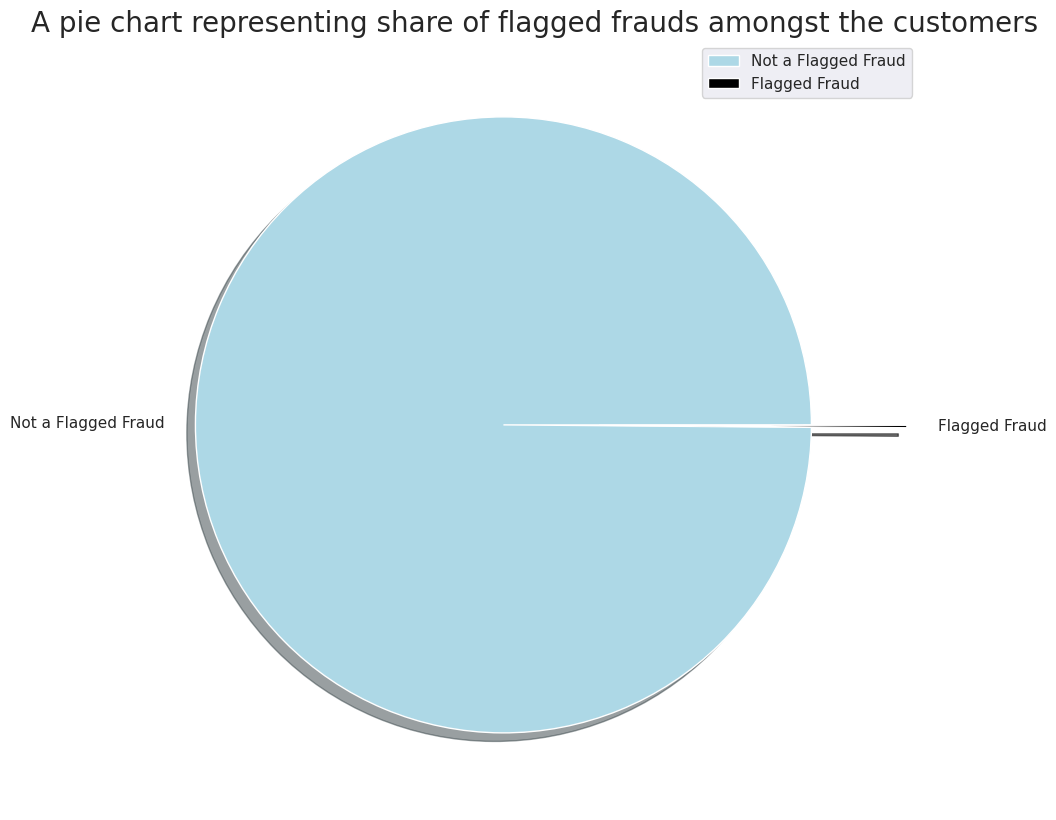

In [113]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [114]:
df['type'].value_counts()

,count
type,
CASH_OUT,336912
PAYMENT,304235
CASH_IN,203430
TRANSFER,76513
DEBIT,5959


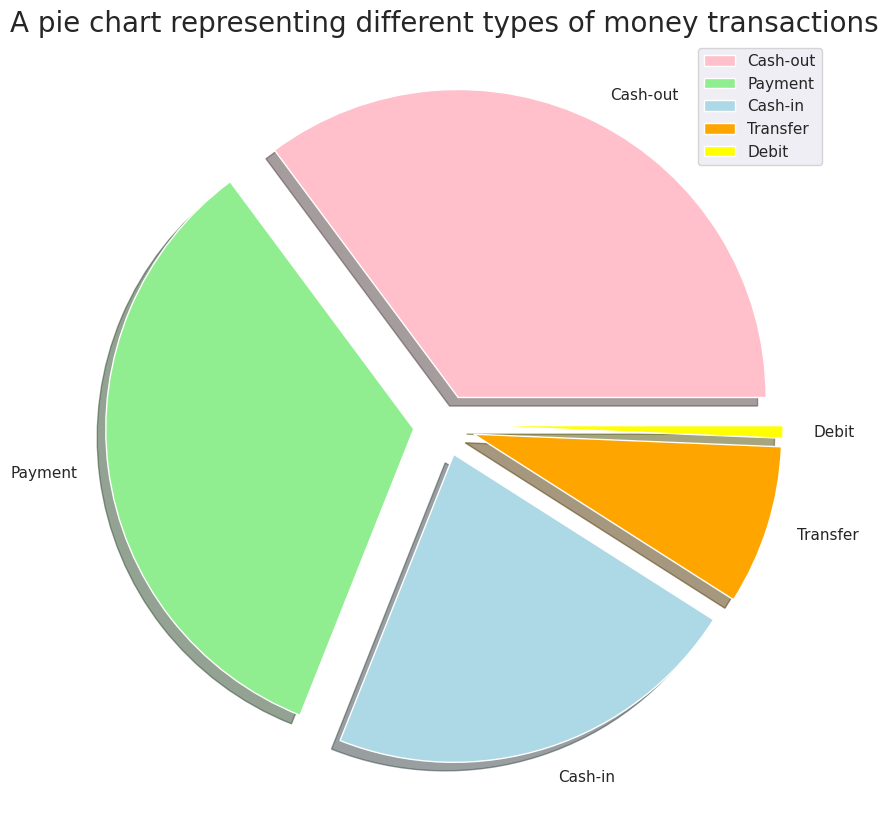

In [115]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [116]:
# checking the different types of steps involved in transactions

x = df['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 41


<ipython-input-117-e2ac24929c21>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.step, fit = norm, kde = False)


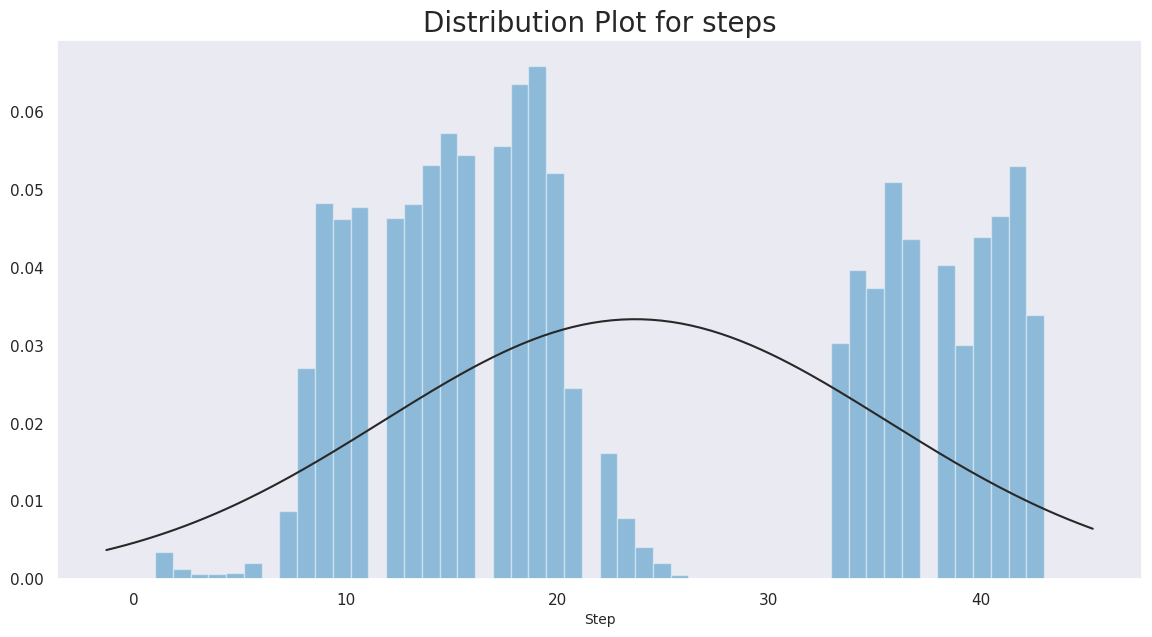

In [117]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(df.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

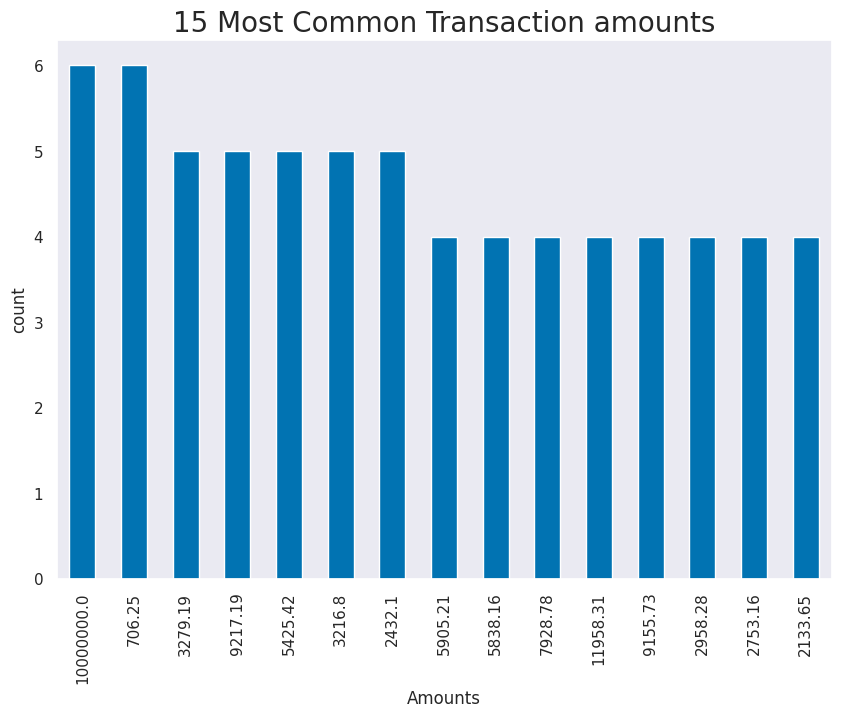

In [118]:
plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

<ipython-input-119-bb577c85ec2f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.amount)


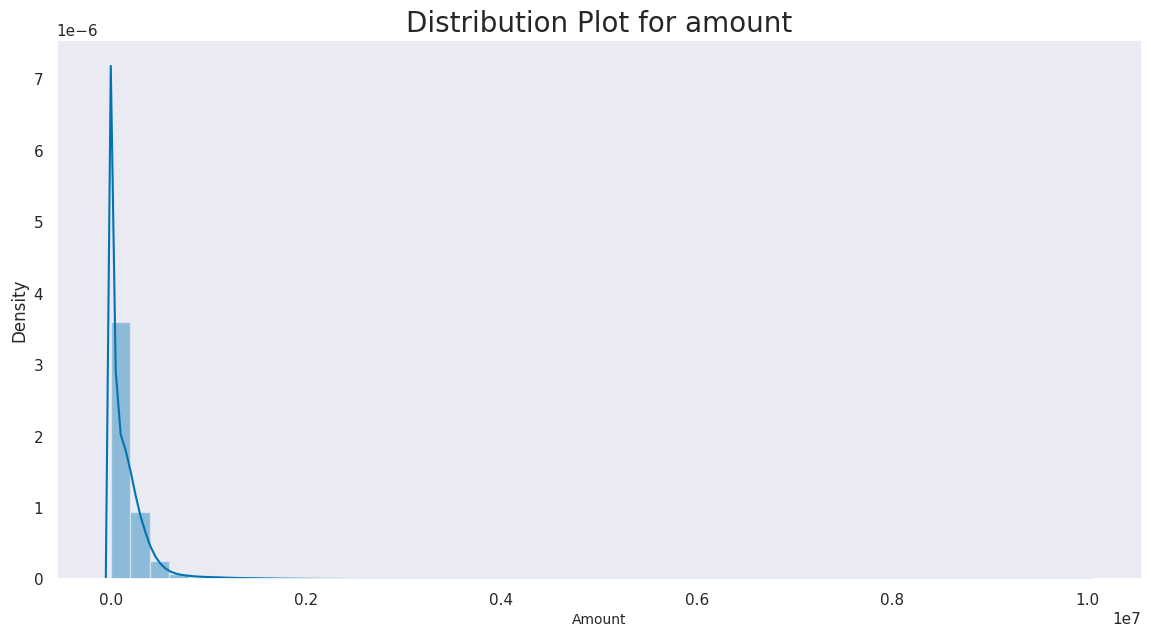

In [119]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(df.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [120]:

# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))


The number of fraudulent TRANSFERs = 244
The number of fraudulent CASH_OUTs = 259


In [121]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0


In [122]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged is set : []


In [123]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 0
Minimum Transaction : nan
Maximum Transaction : nan


In [124]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = df.loc[(df.isFlaggedFraud == 0) & (df.oldbalanceDest == 0) & (df.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :         step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1          1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2          1  TRANSFER    181.00  C1305486145          181.0            0.00   
4          1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
5          1   PAYMENT   7817.71    C90045638        53860.0        46042.29   
...      ...       ...       ...          ...            ...             ...   
927040    43   PAYMENT    341.82   C578154409            0.0            0.00   
927041    43   PAYMENT  10238.60  C1728671809            0.0            0.00   
927042    43   PAYMENT   5422.21   C397229153          904.0            0.00   
927045    43   PAYMENT  11540.72    C87427208         2306.0            0.00   
927046    

In [125]:
# defining a dataset containing only transfer type of transactions

dataTransfer = df.loc[df['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0.0,0.0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0.0,0.0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0.0,0.0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0.0,0.0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0.0,0.0


# Minimum Original old Balance for Flagged Frauds

In [126]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with minimum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [127]:

# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


# Minimum Original Old Balace for non-Flagged Frauds

In [128]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
160646,12,TRANSFER,342317.15,C2070529657,0.0,0.0,C621118463,0.0,0.0,0.0,0.0
175828,12,TRANSFER,18931.59,C257351690,0.0,0.0,C1108098323,0.0,0.0,0.0,0.0
1248,1,TRANSFER,271161.74,C1658487789,0.0,0.0,C1219161283,0.0,0.0,0.0,0.0
282796,15,TRANSFER,421255.41,C1734485985,0.0,0.0,C981307359,0.0,0.0,0.0,0.0
381356,17,TRANSFER,630315.29,C2126290948,22.0,0.0,C1203344902,0.0,0.0,0.0,0.0
277265,15,TRANSFER,119.00,C1995557473,119.0,0.0,C1480876722,0.0,0.0,1.0,0.0
12179,7,TRANSFER,164.00,C1455969984,164.0,0.0,C2119910556,0.0,0.0,1.0,0.0
301801,15,TRANSFER,170.00,C553034695,170.0,0.0,C26381896,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
55995,9,TRANSFER,335556.81,C1745032030,210.0,0.0,C717490079,0.0,0.0,0.0,0.0


# Maximum Original Old Balance for Non-Flagged Frauds

In [129]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
217320,13,TRANSFER,6188514.81,C135832352,6188514.81,0.00,C2009346140,0.0,0.0,1.0,0.0
801933,40,TRANSFER,6188772.44,C979937832,6188772.44,0.00,C1787596520,0.0,0.0,1.0,0.0
597895,33,TRANSFER,6648389.90,C67311634,6648389.90,0.00,C674603923,0.0,0.0,1.0,0.0
759791,38,TRANSFER,7567170.36,C1215509660,7567170.36,0.00,C96222488,0.0,0.0,1.0,0.0
777626,39,TRANSFER,7937954.20,C2057200986,7937954.20,0.00,C1124319645,0.0,0.0,1.0,0.0
650133,35,TRANSFER,9465988.82,C851016578,9465988.82,0.00,C1650562969,0.0,0.0,1.0,0.0
586313,33,TRANSFER,9887819.06,C1548903046,9887819.06,0.00,C2065423383,0.0,0.0,1.0,0.0
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.0,0.0,1.0,0.0
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1.0,0.0
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.0,0.0,1.0,0.0


In [130]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = df.loc[df.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : nan
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : nan


In [131]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 0) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 0) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.max())

# Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within
# transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns
# out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions
# that have isFlaggedFraud set have transacted more than once.


Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [132]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 1) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 1) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.max())


Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: nan
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: nan


In [133]:
df['nameDest'].value_counts().head(20)

,count
nameDest,
C1286084959,96
C985934102,96
C248609774,88
C665576141,87
C1590550415,87
C2083562754,86
C977993101,82
C1360767589,81
C451111351,80


In [134]:
# making dependent and independent sets

X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

# shape of x
X.shape

(413425, 11)

In [135]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0


In [136]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

<ipython-input-136-f0384320cda1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
<ipython-input-136-f0384320cda1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [137]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(413425, 11)

In [138]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [139]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1.0,0.0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,0.0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0.0,0.0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,0.0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,0.0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,0.0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,0.0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,0.0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.0,0.00,54744.51


In [140]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

True

<ipython-input-141-99472f7a202b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color = 'red')
<ipython-input-141-99472f7a202b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceDest'], color = 'red')


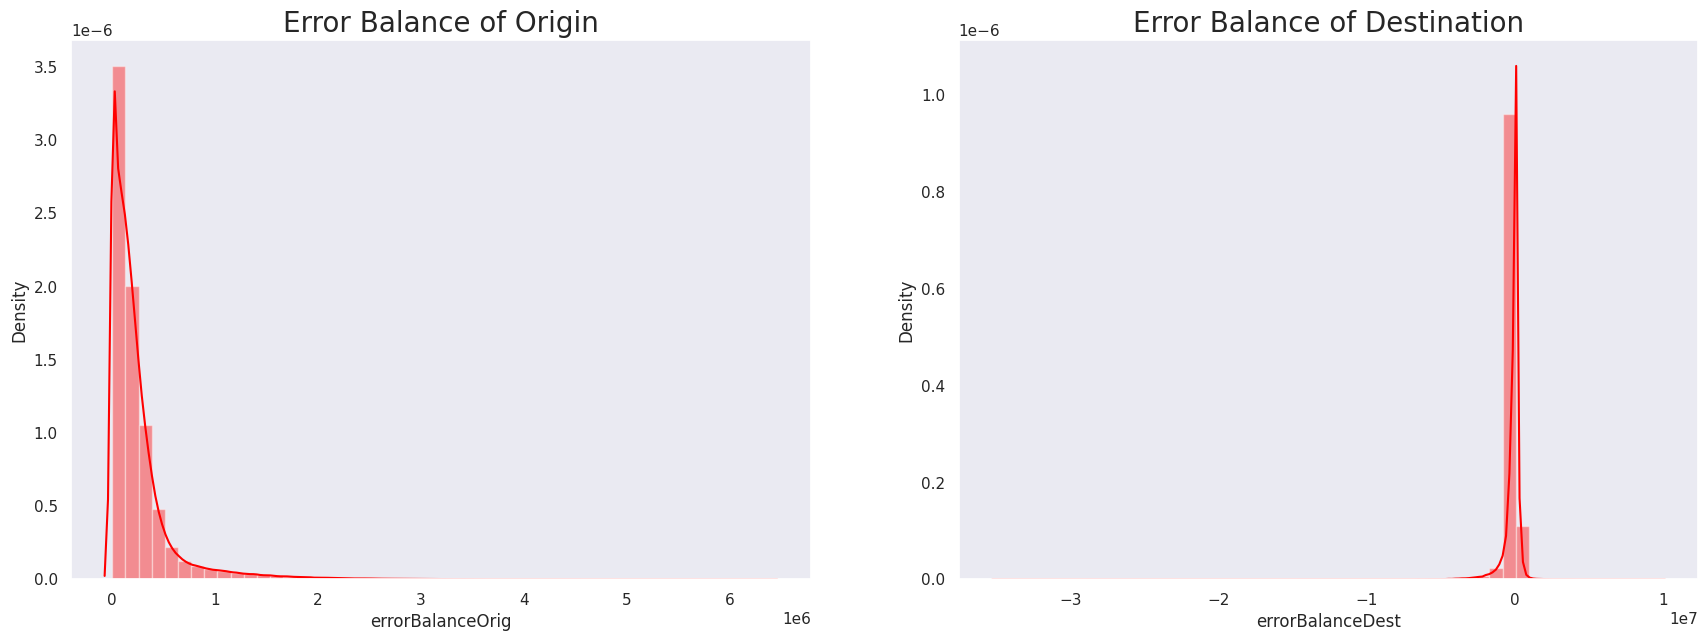

In [141]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

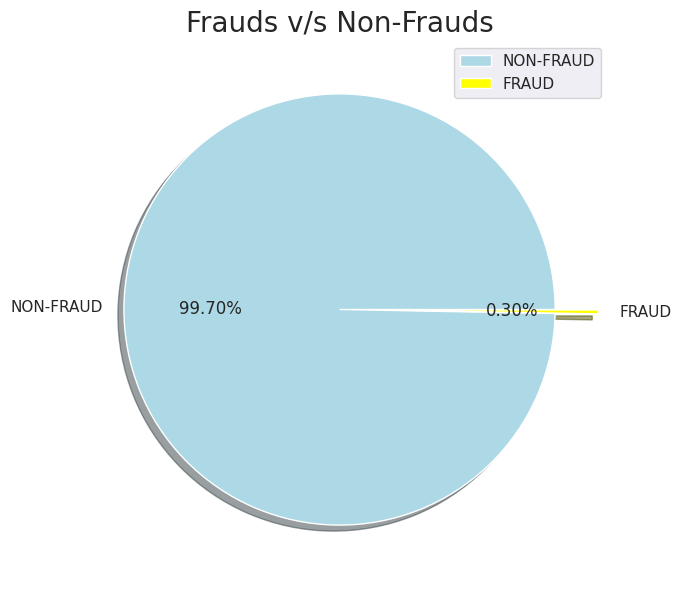

In [142]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts() # Changed 'Fvalue_counts' to 'value_counts()'

# plotting a pie chart to represent the fraction of the frauds

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


In [143]:
X['isFraud'].value_counts()

,count
isFraud,
0.0,412921
1.0,503


In [144]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)


Shape of x:  (413425, 10)
Shape of y:  (413425,)


In [145]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0.0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.0


# OVER-SAMPLING

In [146]:
!pip install imbalanced-learn

In [148]:
from imblearn.over_sampling import SMOTE

# Convert Y to a pandas DataFrame if it's not already
if not isinstance(Y, pd.DataFrame):
    Y = pd.DataFrame(Y)

# Remove rows with NaN values from Y and corresponding rows from X
X = X[Y.notna().values]
Y = Y[Y.notna().values]

# Resample the data using SMOTE
x_resample, y_resample = SMOTE().fit_resample(X, Y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (825842, 10)
Shape of y: (825842,)


In [152]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (660673, 10)
Shape of x_test:  (165169, 10)
Shape of y_train:  (660673,)
Shape of y_test:  (165169,)


In [153]:
# performing standard scaling on the data for better fit

# from sklearn.preprocessing import StandardScaler --> already imported

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modelling using Xg-Boost Model

In [154]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9975537728995961


In [155]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[82367   159]
 [   87 82556]]


# Key Factors Predicting Fraudulent Customers

**Transaction Amount**: Fraudsters often try to steal large sums of money, so higher transaction amounts are a major red flag.

**Old Balance**  of Origin: A dramatic decrease in the sender's account balance before a transaction could indicate that funds are being siphoned off illegally.

**New Balance** New Balance of Destination: If the recipient's account balance shows an unexpected or unusually large increase, it might be a sign of fraudulent activity.

**Transaction Type**: Transfer and cash-out transactions are particularly vulnerable to fraud, as they involve moving money between accounts and potentially withdrawing it from the system.

# Do These Factors Make Sense?

**Yes, these factors make sense because:**

**Large, unusual transactions **deviate significantly from expected patterns. Fraudsters often attempt to transfer large sums of money or make many small transactions to avoid detection. Analyzing transaction amounts relative to a customer's usual activity can reveal suspicious behavior.

**Drastic changes in customer balance**s can signal unauthorized access or attempts to drain an account. Monitoring balance fluctuations and comparing them to historical trends is crucial for identifying potential fraud. For example, a sudden drop in the originator's balance coupled with a sharp rise in the recipient's balance could indicate a fraudulent transfer.

**TRANSFER and CASH_OUT transaction**s are inherently riskier. These transaction types provide opportunities for criminals to move stolen funds quickly and anonymously. By focusing on these specific types, fraud detection systems can be optimized for greater accuracy and efficiency.

# Prevention Measures for Infrastructure

Real-time Monitoring: Implement a real-time monitoring system that flags suspicious transactions based on thresholds for the identified key factors (e.g., large transactions).

Multi-factor Authentication: Enhance authentication during high-risk activities like money transfers

Limit High-Risk Transactions: For certain transaction types like CASH_OUT, impose limits or delays for higher amounts.

AI/ML-Based Fraud Systems: Continuously update machine learning models to learn from new patterns of fraudulent behavior.